In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

# Global figure properties (publication) 국룰 !
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({'font.size':14})

## [예제 진행 코드]

In [3]:
# Data citation: Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand
#                prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020
# data source website: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

# import the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"
data = pd.read_csv(url,sep=',',encoding='unicode_escape')
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
data.shape

(8760, 14)

In [15]:
# One-hot encoding
data.replace(['Spring','Summer', 'Autumn','Winter'],[1,1,0,0], inplace=True) # (봄, 여름: 1), (가을, 겨울: 0)
data

<ipython-input-15-d8612b07d7fe>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(['Spring','Summer', 'Autumn','Winter'],[1,1,0,0], inplace=True)


Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons  \
0                         0.0           0.0            0.0        0   
1                         0.0           0.0            0.0        0   
2                         0.0           0.0            0.0        0   
3                         0.0           0.0            0.0        0   
4                         0.0           0.0            0.0        0   
...                       ...           ...            ...      ...   
8755                      0.0           0.0            0.0        0   
8756                      0.0           0.0            0.0        0   
8757                      0.0           0.0            0.0        0   
8758                      0.0           0.0            0.0        0   
8759                      0.0           0.0            0.0        0   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [16]:
# Create a design matrix
desmat = data[['Rainfall(mm)','Seasons']].to_numpy()

# add an intercept
desmat = np.append(desmat,np.ones((desmat.shape[0],1)),axis=1)

# extract DV (Dependent Variable 이겠지?)
y = data[['Rented Bike Count']].to_numpy()

In [17]:
# run the regression
beta = np.linalg.lstsq(desmat, y, rcond=None)
beta[0]

array([[-80.52367456],
       [369.12668112],
       [530.49459615]])

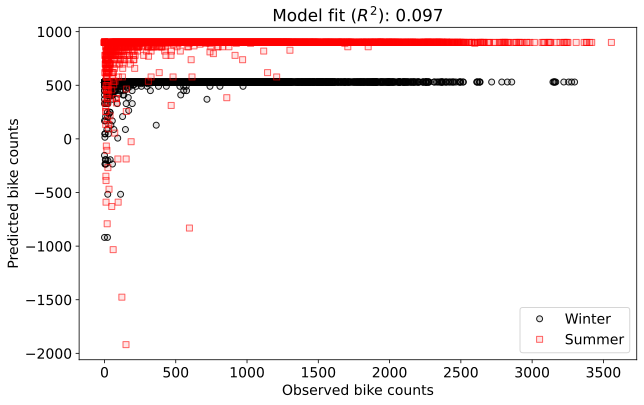

In [32]:
# predicted data
yHat = desmat@beta[0]

# model fit to data (R^2)
modelfit = np.corrcoef(y.T,yHat.T)[0,1]**2


# and plot
plt.figure(figsize=(10,6))
plt.plot(y[desmat[:,1]==0],yHat[desmat[:,1]==0],'o',markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9),label='Winter')
plt.plot(y[desmat[:,1]==1],yHat[desmat[:,1]==1],'s',markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')
plt.legend()
plt.xlabel('Observed bike counts')
plt.ylabel('Predicted bike counts')
plt.title(f'Model fit ($R^2$): {modelfit:.3f}')
plt.show()

## [Problem 11-1]
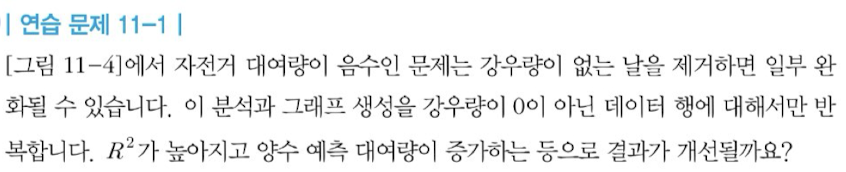

#### [그림 11-4]
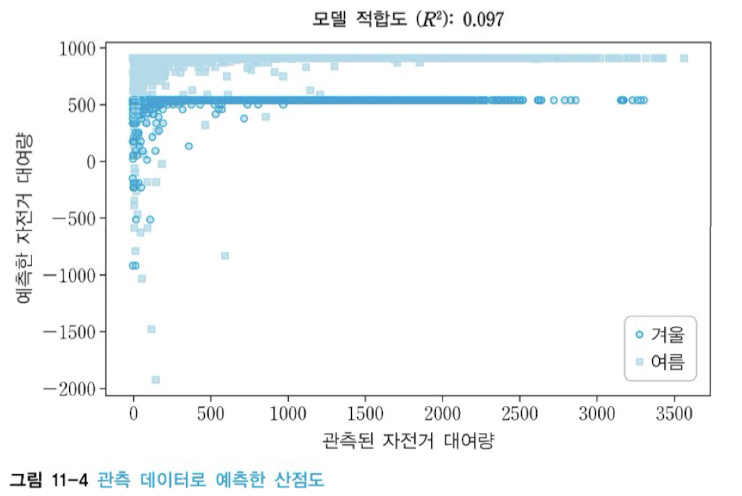

In [20]:
# 강우량이 0인 데이터 행 제거
data['Rainfall(mm)'].value_counts()

Rainfall(mm)
0.0     8232
0.5      116
1.0       66
1.5       56
0.1       46
        ... 
1.9        1
3.3        1
17.0       1
1.4        1
1.8        1
Name: count, Length: 61, dtype: int64

In [21]:
data_rain = data[data['Rainfall(mm)'] > 0] # 8232개 제거
data_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528 entries, 51 to 8604
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       528 non-null    object 
 1   Rented Bike Count          528 non-null    int64  
 2   Hour                       528 non-null    int64  
 3   Temperature(°C)            528 non-null    float64
 4   Humidity(%)                528 non-null    int64  
 5   Wind speed (m/s)           528 non-null    float64
 6   Visibility (10m)           528 non-null    int64  
 7   Dew point temperature(°C)  528 non-null    float64
 8   Solar Radiation (MJ/m2)    528 non-null    float64
 9   Rainfall(mm)               528 non-null    float64
 10  Snowfall (cm)              528 non-null    float64
 11  Seasons                    528 non-null    int64  
 12  Holiday                    528 non-null    object 
 13  Functioning Day            528 non-null    object 
dt

In [22]:
# design matrix
desmat_rain = data_rain[['Rainfall(mm)','Seasons']].to_numpy()

# add an intercept
desmat_rain = np.append(desmat_rain, np.ones((desmat_rain.shape[0],1)),axis=1)

# extract DV
y_rain = data_rain[['Rented Bike Count']].to_numpy()

# run the regression
beta_rain = np.linalg.lstsq(desmat_rain, y_rain, rcond=None)
beta_rain[0]

array([[ -9.82999823],
       [ 48.42999142],
       [152.11692428]])

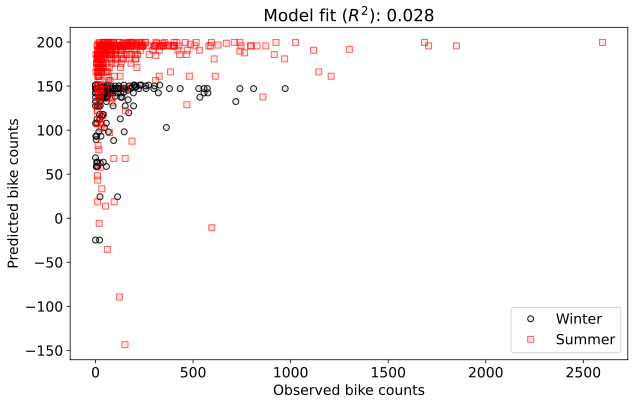

In [31]:
# predicted data
yHat_rain = desmat_rain @ beta_rain[0]

# model fit to data (R^2)
modelfit_rain = np.corrcoef(y_rain.T, yHat_rain.T)[0,1]**2


# and plot
plt.figure(figsize=(10,6))
plt.plot(y_rain[desmat_rain[:,1]==0], yHat_rain[desmat_rain[:,1]==0],'o',markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9),label='Winter')
plt.plot(y_rain[desmat_rain[:,1]==1], yHat_rain[desmat_rain[:,1]==1],'s',markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')
plt.legend()
plt.xlabel('Observed bike counts')
plt.ylabel('Predicted bike counts')
plt.title(f'Model fit ($R^2$): {modelfit_rain:.3f}')
# plt.savefig('Figure_11_04.png',dpi=300)
plt.show()

#### 결과 해석

In [39]:
# (1) 양수 예측 대여량
(yHat>0).sum() / len(yHat)           # Before: 강우량 없는 날 제거 전 99.66%
(yHat_rain>0).sum() / len(yHat_rain) # After : 강우량 없는 날 제거 후 98.67%

0.9867424242424242

In [45]:
print(f'강우량 없는 날 제거 전 대여량 음수 예측 수: {(yHat<0).sum()} \n강우량 없는 날 제거 후 대여량 음수 예측 수: {(yHat_rain<0).sum()}')

강우량 없는 날 제거 전 대여량 음수 예측 수: 30 
강우량 없는 날 제거 후 대여량 음수 예측 수: 7


- 강우량 없는 날 제거 후, **양수 예측 대여량 비율은 오히려 감소**했다.
  - 양수 예측 대여량 개수는 물론 감소 (행 자체가 매우 줄었으니 당연한 결과)

In [59]:
# (2) R^2 변화
np.corrcoef(y.T, yHat.T) # 이 코드보다
r2_before = np.corrcoef(y.flatten(), yHat.flatten())[0, 1] ** 2 # 이 코드가 확실해
r2_after  = np.corrcoef(y_rain.flatten(), yHat_rain.flatten())[0, 1] ** 2
print(f'강우량 없는 날 제거 전 R^2: {r2_before} \n강우량 없는 날 제거 후 R^2: {r2_after}')

강우량 없는 날 제거 전 $$R^2$$: 0.09671455924979833 
강우량 없는 날 제거 후 $R^2$: 0.02820168852940746


- $R^2$는 강우량 없는 날 제거 후 오히려 감소

## [Problem 11-2]
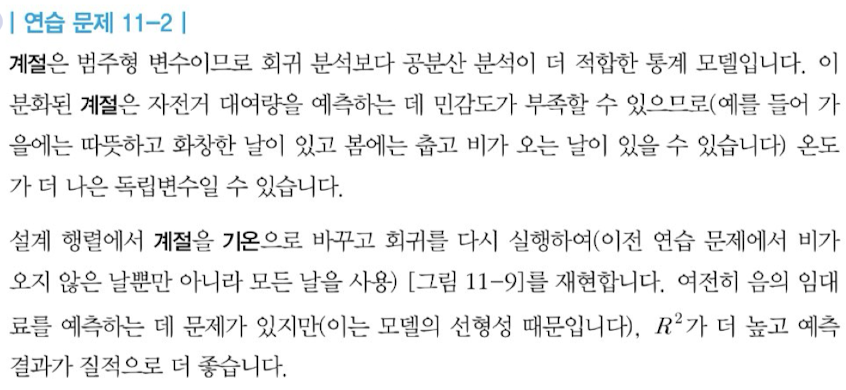

#### [그림 11-9]
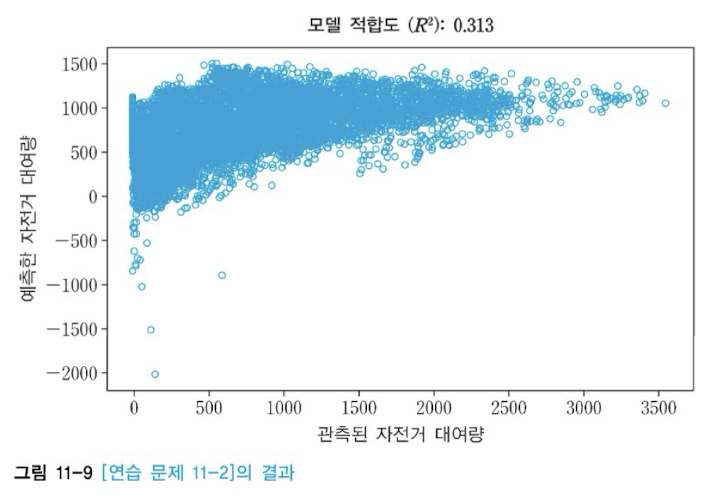

In [61]:
# Seasons 대신 Temperature(°C)
desmat = data[['Rainfall(mm)','Temperature(°C)']].to_numpy()

desmat = np.append(desmat,np.ones((desmat.shape[0],1)),axis=1)

y = data[['Rented Bike Count']].to_numpy()

In [62]:
beta = np.linalg.lstsq(desmat, y, rcond=None)
beta[0]

# predicted data
yHat = desmat@beta[0]

# model fit to data (R^2)
modelfit = np.corrcoef(y.T,yHat.T)[0,1]**2

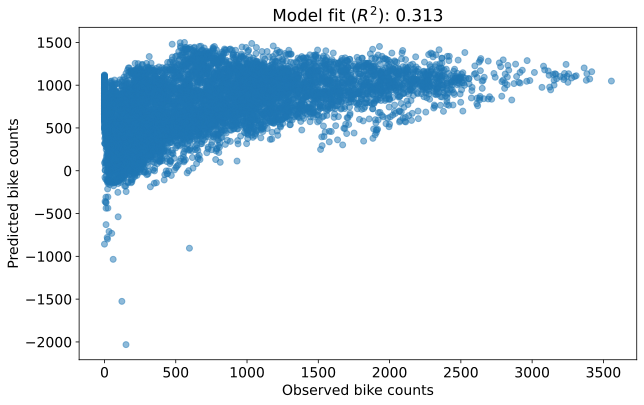

In [67]:
# predicted data
yHat = desmat@beta[0]

# model fit to data (R^2)
modelfit = np.corrcoef(y.T,yHat.T)[0,1]**2


plt.figure(figsize=(10,6))
plt.plot(y, yHat, 'o', alpha = 0.5)
plt.xlabel('Observed bike counts')
plt.ylabel('Predicted bike counts')
plt.title(f'Model fit ($R^2$): {modelfit:.3f}')
plt.show()

## [Problem 11-3]
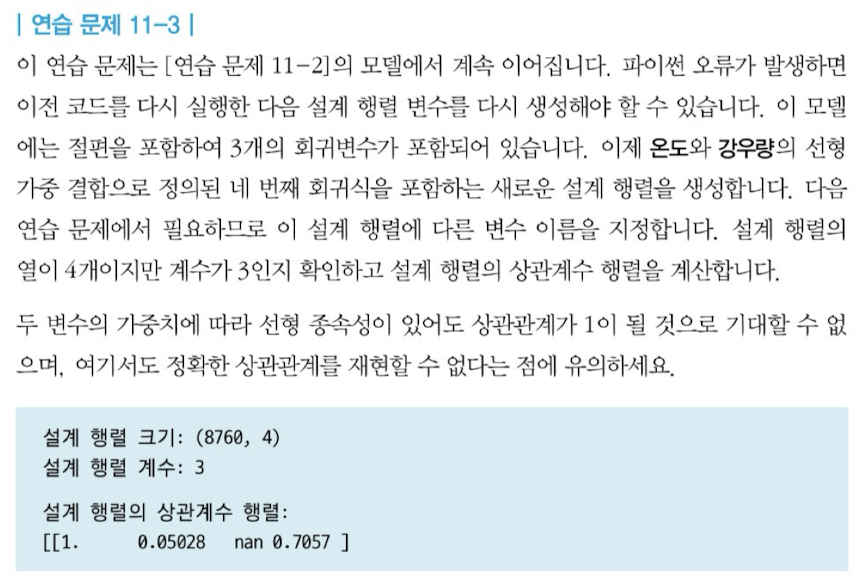
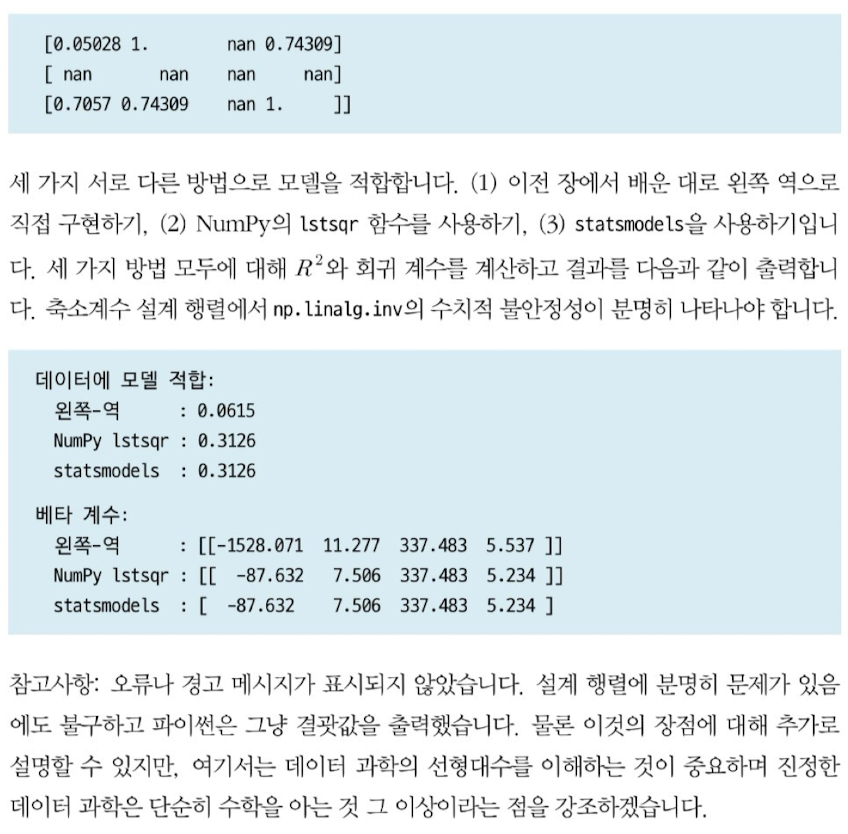

#### 11-3-1) Feature Engineering (온도와 강수량의 선형결합)
- 저자는 `4*온도 + 0.4*강수량` 으로 생성
> Rank 확인도 해라
- 그 다음, Design Mat의 corrcoef

In [77]:
newfeature = 4*desmat[:, 0] + 0.4*desmat[:, 1]

desmat.shape

(8760, 3)

In [85]:
np.append(desmat, newfeature.reshape(-1, 1), axis=1).shape # Good

desmat_new = np.append(desmat, newfeature.reshape(-1, 1), axis=1)
desmat_new

array([[ 0.  , -5.2 ,  1.  , -2.08],
       [ 0.  , -5.5 ,  1.  , -2.2 ],
       [ 0.  , -6.  ,  1.  , -2.4 ],
       ...,
       [ 0.  ,  2.6 ,  1.  ,  1.04],
       [ 0.  ,  2.1 ,  1.  ,  0.84],
       [ 0.  ,  1.9 ,  1.  ,  0.76]])

In [90]:
new_shape = desmat_new.shape
new_rank = np.linalg.matrix_rank(desmat_new)
new_corr = np.corrcoef(desmat_new.T)

print(f'Shape: {new_shape}')
print(f'Rank: {new_rank}')
print(f'Corr: \n{new_corr}')

Shape: (8760, 4)
Rank: 3
Corr: 
[[1.         0.05028186        nan 0.70570444]
 [0.05028186 1.                nan 0.74309427]
 [       nan        nan        nan        nan]
 [0.70570444 0.74309427        nan 1.        ]]


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


#### 11-3-2) Model Fitting (3가지 방식으로)


In [94]:
X = desmat_new

##### (1) Left inverse로 구현하기

In [96]:
new_beta_1 = np.linalg.inv(X.T @ X) @ X.T @ y
new_beta_1

array([[-1.67069957e+03],
       [-1.12176307e+00],
       [ 3.37483294e+02],
       [ 1.17150688e+02]])

In [122]:
yHat_1 = X @ new_beta_1

new_r2_1 = np.corrcoef(y.flatten(), yHat_1.flatten())[0, 1]**2
new_r2_1

0.10306927861230561

##### (2) Numpy `lstsqr` 사용

In [123]:
coefficients, residuals, rank, singular_values = np.linalg.lstsq(X, y, rcond=None)

new_beta_2 = coefficients
new_beta_2

array([[ -8.56732457],
       [ 37.23925633],
       [337.48329388],
       [-19.37359576]])

In [124]:
yHat_2 = X @ new_beta_2

new_r2_2 = np.corrcoef(y.flatten(), yHat_2.flatten())[0, 1]**2
new_r2_2

0.3126481542486898

##### (3) `statsmodels` 사용

In [125]:
import statsmodels.api as sm

# X_sm = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     1992.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:55:42   Log-Likelihood:                -67458.
No. Observations:                8760   AIC:                         1.349e+05
Df Residuals:                    8757   BIC:                         1.349e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -8.5673      0.348    -24.623      0.0

In [126]:
new_beta_3 = model.params
new_r2_3 = model.rsquared

#### 11-3-3) 결과 정리

In [133]:
print('데이터 모델 적합(R^2):')
print(f'- Left-inverse: {np.round(new_r2_1, 4)}') # 책이랑 다른데, 저자 풀이랑은 같은 결과
print(f'- Numpy lstsq: {np.round(new_r2_2, 4)}')
print(f'- statsmodels: {np.round(new_r2_3, 4)}')

print()

print('Beta coefficients:')
print(f'- Left-inverse: {np.round(new_beta_1.flatten(), 3)}')
print(f'- Numpy lstsq: {np.round(new_beta_2.flatten(), 3)}')
print(f'- statsmodels: {np.round(new_beta_3, 3)}')

데이터 모델 적합(R^2):
- Left-inverse: 0.1031
- Numpy lstsq: 0.3126
- statsmodels: 0.3126

Beta coefficients:
- Left-inverse: [-1.67070e+03 -1.12200e+00  3.37483e+02  1.17151e+02]
- Numpy lstsq: [ -8.567  37.239 337.483 -19.374]
- statsmodels: [ -8.567  37.239 337.483 -19.374]


## [Problem 11-4]
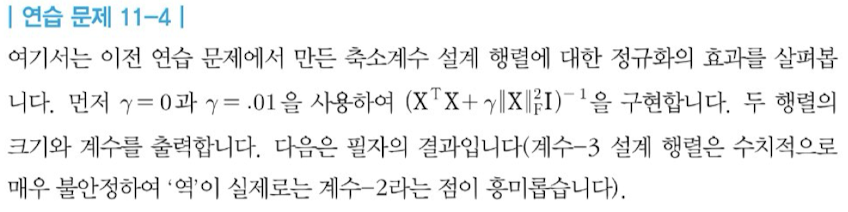
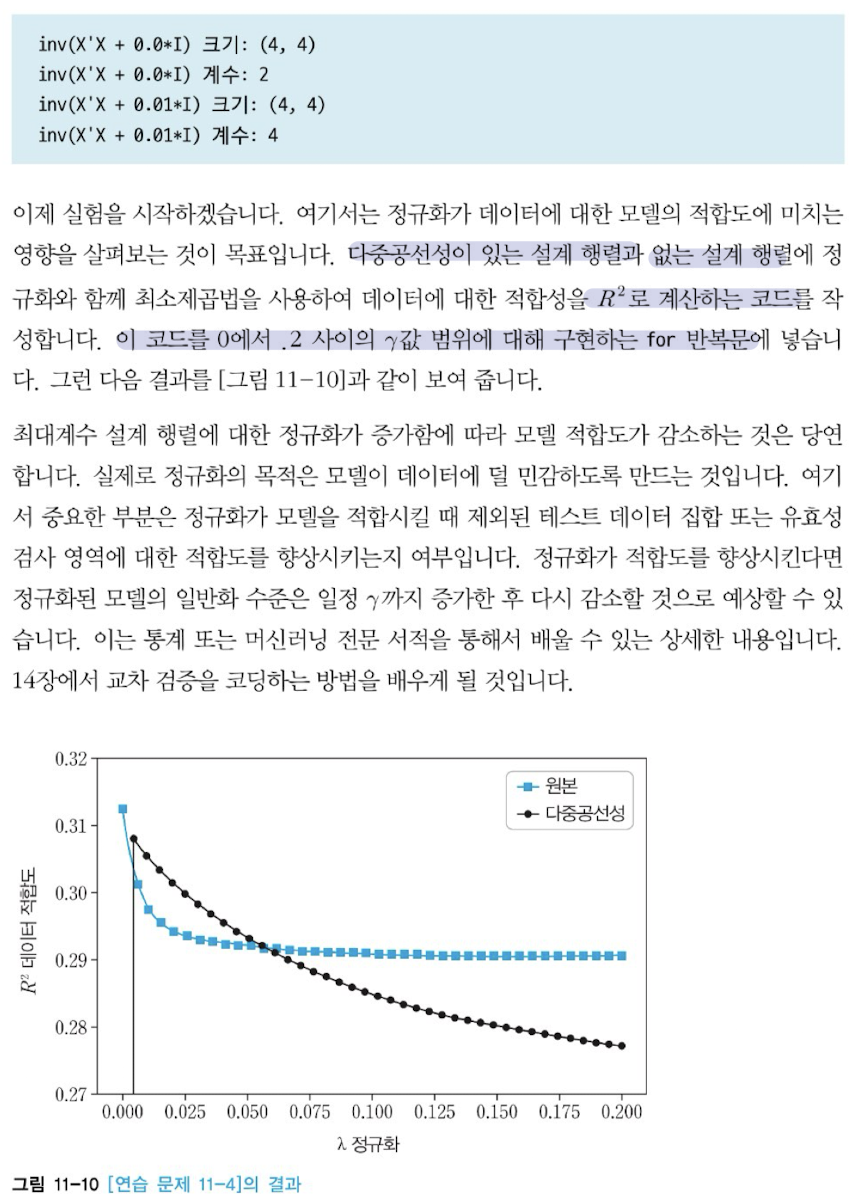

### 11-4-1) Regularization

In [134]:
# Regularization hyperparameters
gamma_1 = 0
gamma_2 = 0.01

In [145]:
regMat1 = np.linalg.inv(X.T@X + gamma_1*np.linalg.norm(X, ord='fro')**2 *np.eye(X.shape[1]))
regMat2 = np.linalg.inv(X.T@X + gamma_2*np.linalg.norm(X, ord='fro')**2 *np.eye(X.shape[1]))

In [146]:
print(f'inv(X\'X + 0.0*I) dim: {regMat1.shape}')
print(f'inv(X\'X + 0.0*I) rank: {np.linalg.matrix_rank(regMat1)}')
print(f'inv(X\'X + 0.01*I) dim: {regMat2.shape}')
print(f'inv(X\'X + 0.01*I) rank: {np.linalg.matrix_rank(regMat2)}')

inv(X'X + 0.0*I) dim: (4, 4)
inv(X'X + 0.0*I) rank: 2
inv(X'X + 0.01*I) dim: (4, 4)
inv(X'X + 0.01*I) rank: 4


### 11-4-2) Experiment (Regularization이 모델 적합도에 미치는 영향)

In [150]:
gamma_list = np.linspace(0, .2, 40)

In [178]:
X = desmat
X_Mul = desmat_new

In [181]:
r2_list = []
r2_list_Mul = []

for i in gamma_list:
  # Design Matrix (Multicolinearity X)
  leftinv = np.linalg.inv(X.T@X + i * np.linalg.norm(X, ord='fro')**2 * np.eye(X.shape[1])) @ X.T
  beta = leftinv@y
  yHat = X@beta

  r2 = np.corrcoef(y.flatten(), yHat.flatten())[0, 1]**2
  r2_list.append(r2)

  # Design Matrix (Multicolinearity O)
  leftinv = np.linalg.inv(X_Mul.T@X_Mul + i * np.linalg.norm(X_Mul, ord='fro')**2 * np.eye(X_Mul.shape[1])) @ X_Mul.T
  beta = leftinv@y
  yHat = X_Mul@beta

  r2 = np.corrcoef(y.flatten(), yHat.flatten())[0, 1]**2
  r2_list_Mul.append(r2)

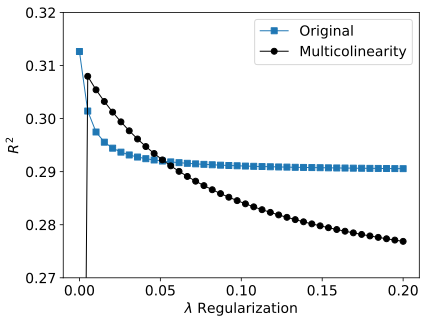

In [192]:
plt.plot(gamma_list, r2_list,'s-',linewidth=1,label='Original')
plt.plot(gamma_list, r2_list_Mul,'o-',linewidth=1,label='Multicolinearity',color='k')
plt.xlabel('$\lambda$ Regularization')
plt.ylabel('$R^2$')
plt.ylim([.27,.32])
plt.legend()
plt.show()

## [Problem 11-5]: Shared Problem